In [2]:
Name = "Yujing Zhang"
Collaborator = "Consult with TAs"
Uni="yz4471"

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** [10] Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

Taylor series equation: 
$$f(x) = f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+\cdots$$
Since $$f(x)=(x-1)^{-1}, f'(x)=-(x-1)^{-2}, f''(x)=2(x-1)^{-3},f'''(x)=-6(x-1)^{-4}$$
So $$f^{(n)}(x)=(-1)^nn!(x-1)^{-n-1}$$
And $$f^{(n)}(0)=-n!$$
Therefore, $$f(x)=\sum_{n=0}^\infty -x^n$$

**(b)** [5] What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

$$ P_3(x) = ((- x -1) x -1) x -1$$

$$ P_N(x) = ((((- x -1) x -1) x -1)x-1)x\cdots-1)$$

$$Operation = \mathcal{O}(N)$$

**(c)** [15] Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

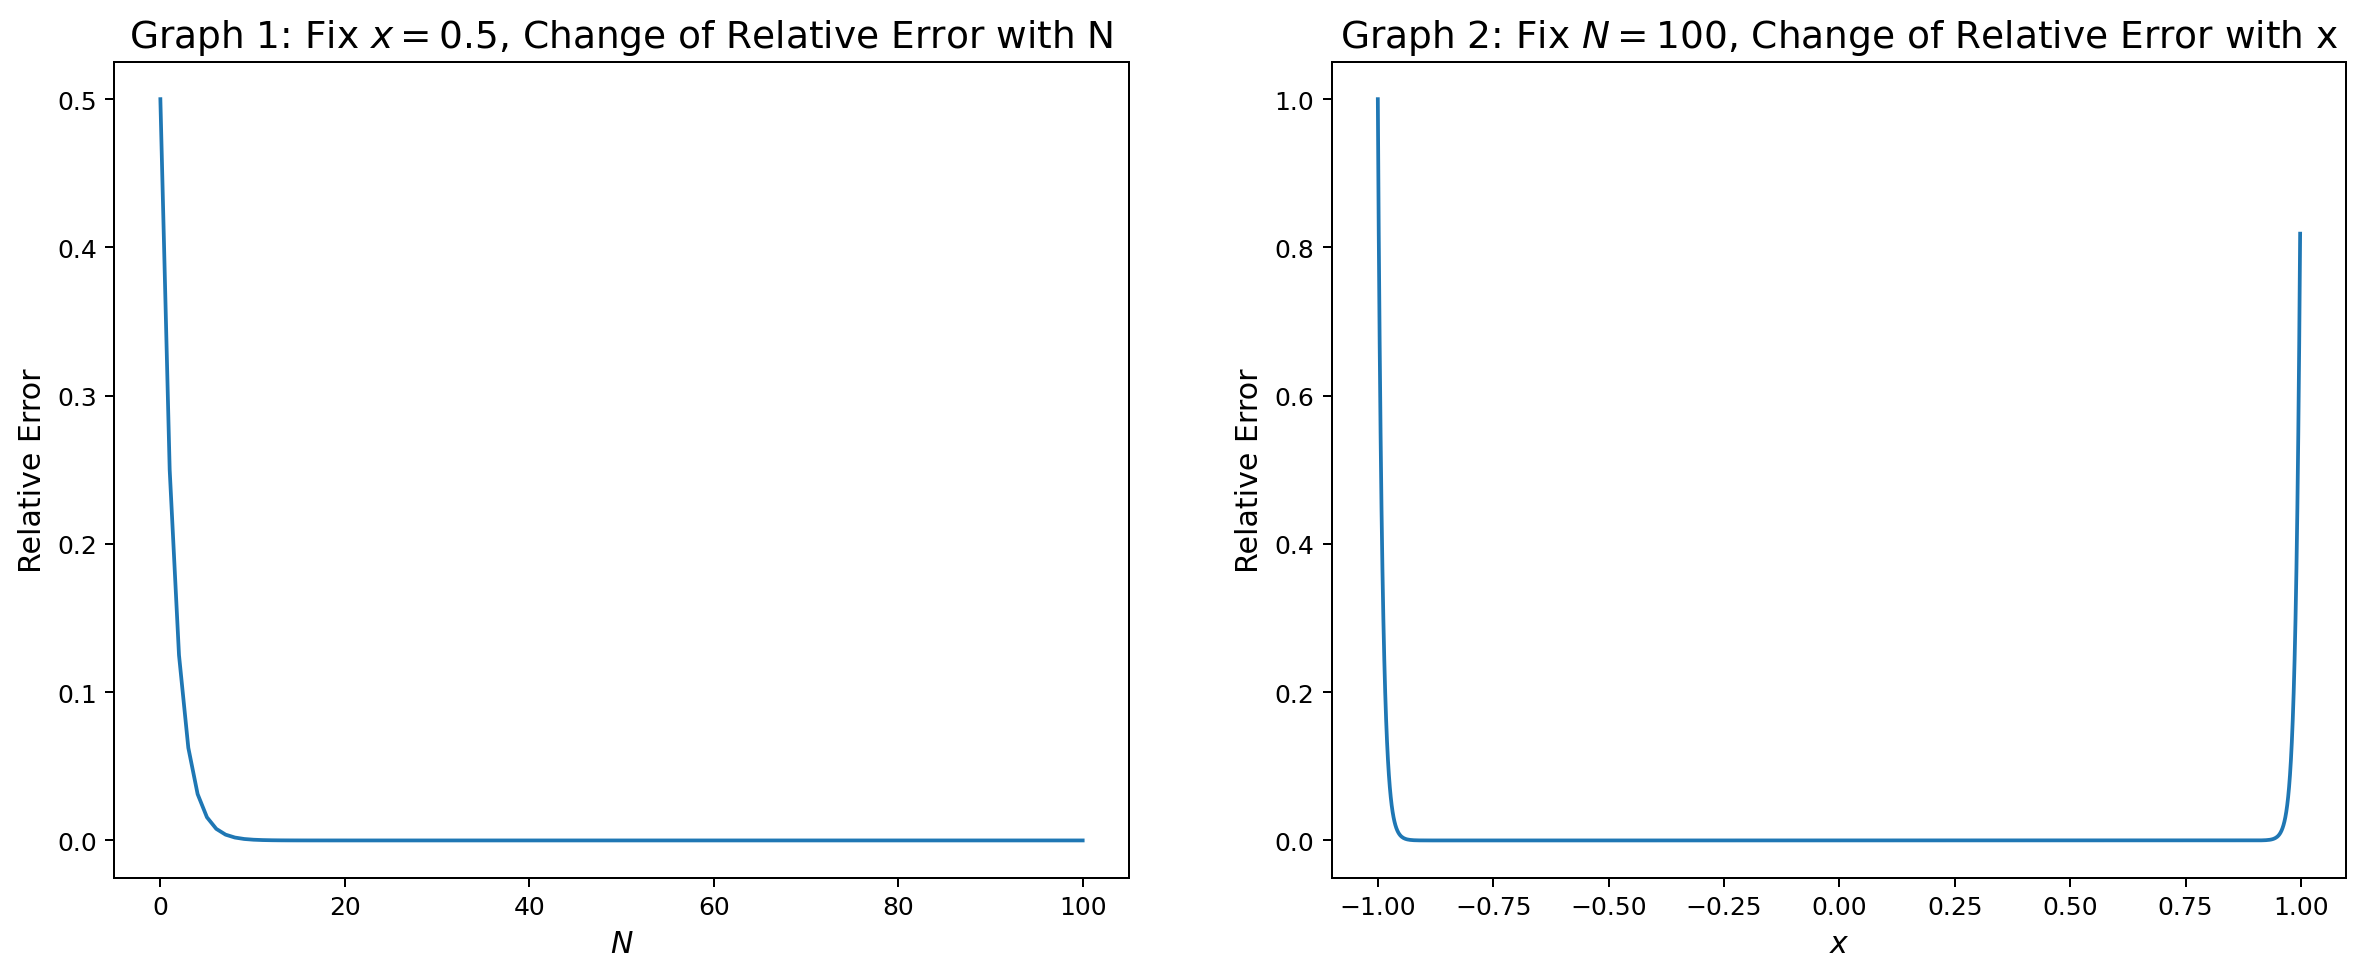

In [3]:
#graph 1
x = 0.5
N = numpy.linspace(0, 100, 100)
f = 1/(x-1)
r = []
F = 0                            #do not forget to give initial value!!!

for j in range (1,101):
    for i in range(j-1,j):
        F -= 0.5**(i)
        R = abs(f-F)/abs(f)
    r.extend([R])

fig = plt.figure(figsize=(16,6),dpi=180)
plt.subplot(1, 2, 1)
plt.plot(N,r)
plt.xlabel("$N$",fontsize=12)
plt.ylabel("Relative Error",fontsize=12)
plt.title("Graph 1: Fix $x=0.5$, Change of Relative Error with N", fontsize=15)

#graph 2
x_new = numpy.linspace(-1,1,1000,endpoint=False)
f_new = 1/(x_new-1)
F_new = 0
for i in range(100):
    F_new -= x_new**i
r_new = abs(f_new-F_new)/abs(f_new)

plt.subplot(1, 2, 2)
plt.plot(x_new,r_new)
plt.xlabel("$x$",fontsize=12)
plt.ylabel("Relative Error",fontsize=12)
plt.title("Graph 2: Fix $N=100$, Change of Relative Error with x", fontsize=15)

plt.show()

1. When we fix $x\neq x_0$, the relative error $r$ will decrese as the increase of $N$. Try to explain: When we fix $x\neq x_0$, true value of function $f$ is fixed, but $F$ will converge to the true value as $N$ increase. Therefore, $r$ will decrease.
2. When we fix $N$, the relative error $r$ will approach to $0$ as $x$ approaches to $x_0$.

## Question 2

**(a)** [5] Consider the following two equivalent sums:

$$
    \sum^\infty_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^\infty_{n=1} \frac{1}{n (n + 1)}
$$

Write two Python functions that compute each of these sums but to a finite number of terms $N$.

In [4]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    n=1
    Sn=0
    for n in range(1,N):
        Sn+=1/n-1/(n+1)

    return Sn


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    n=1
    Sn=0
    for n in range(1,N):
        Sn+=1/(n*(n+1))
    
    return Sn

In [5]:
for N in range(5, 21, 5):
    numpy.testing.assert_allclose(sum_1(N), sum_2(N))
print("Success!")

Success!


**(b)** [5] Compute the absolute error between the two summation approaches.

In [6]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    error = abs(sum_1(N) - sum_2(N))
    
    return error

In [7]:
N = numpy.logspace(1, 7, 7, dtype=int)
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

Success!


**(c)** [10] Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

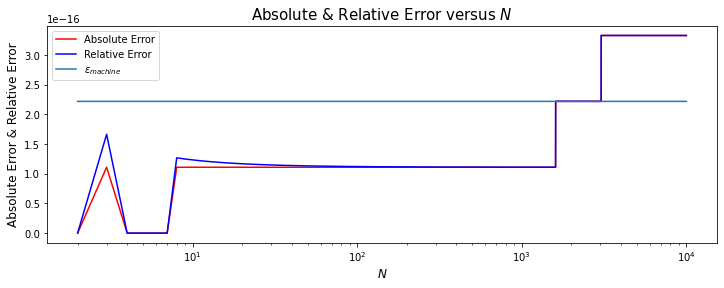

In [8]:

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

def rel_error(N):
    rel_error = abs(sum_1(N) - sum_2(N))/abs(sum_1(N))
    return rel_error

R_list = []
N_list = []
r_list = []
for N in range (2,10000):
    N_list.extend([N])
    R_list.extend([abs_error(N)])
    r_list.extend([rel_error(N)])
    
eps_list = []
for N in range (2,10000):
    eps_list.extend([numpy.finfo(float).eps])

plt.semilogx(N_list, R_list,"r", N_list, r_list,"b", N_list, eps_list)
plt.legend(["Absolute Error", "Relative Error","$\epsilon_{machine}$"], loc=0)
plt.xlabel("$N$", fontsize=12)
plt.ylabel("Absolute Error & Relative Error",fontsize=12)
plt.title("Absolute & Relative Error versus $N$",fontsize=15)

plt.show()

#Comments: below

Comments:
1. The absolute error and relative error both rise with the increase of $N$ from lower than $\epsilon_{machine}$ to larger than $\epsilon_{machine}$, and rise in a polyline pattern rather than a linear rise
2. The relative error converges to absolute error as the increase of $N$


**Please Look at Here!!**

I discussed with my friends about this question, and we have two versions.

The above one is written by me, and I think the logic it's correct:

We have the similar codes, but I don't know why the plots are totally different: I will write version 2 in the next cell~

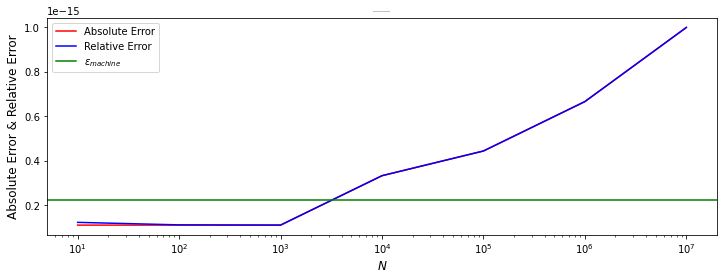

In [9]:
#Version 2:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

abso = []
rel = []
eps = numpy.finfo(float).eps

N = numpy.logspace(1,7,7,dtype=int)
for i in N:
    a = abs_error(i)
    r = a/sum_1(i)
    abso.append(a)
    rel.append(r)

plt.semilogx(N, abso, "r", N, rel, "b")
plt.axhline(eps, label = "$\epsilon_{machine}$", color="green")
plt.title("Absolute & Relative Error versus $N$",fontsize=1)
plt.xlabel("$N$", fontsize=12)
plt.ylabel("Absolute Error & Relative Error",fontsize=12)
plt.legend(["Absolute Error", "Relative Error","$\epsilon_{machine}$"], loc=0)
plt.show()

Comments:
1. The absolute error and relative rise as $N$ increases
2. The relative error converges to absolute error as the increase of $N$

**(d)** [5] Theorize what may have lead to the differences in answers.

1. When the absolute and relative value is less than $\epsilon_{machine}$, it will cause floating error
2. As N approaches to infinity, the error will accumulate

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** [10] Derive the upper bound on the *relative error* $r_n$ assuming that $0 < x$ and

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**Solution:**

Recall that $$ f(x) = T_n(x) + R_n(x)$$
So, $$r_n= \left|\frac{f(x)-T_n(x)}{f(x)}\right|$$
Therefore, $$r_n=\left|\frac{R_n(x)}{f(x)}\right|$$
And $$R_n(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$
Plug $x_0=0$, where we expand the Taylor Polynomial: 
$$R_n(x) = \frac{e^c \cdot x^{n+1}}{(n+1)!}$$


$$r_n = \left|\frac{e^c \cdot x^{n+1}}{(n+1)!e^x}\right|$$
Moreover, $x>0, c\in[x,x_0=1], e^c=1, e^{-x}\leq 1$
So,
$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**(b)** [10] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

**Solution:**

According to Python Access to IEEE Numbers,$$\epsilon_{machine} < 1$$

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right | <1$$

$$x^{n+1}\leq (n + 1)!$$

Using log on both sides,

$$(n+1)log(x) < (n+1)log(n+1)-(n+1)$$

Then, we have:
$$log(x) < log(n+1)-1$$

Moreover, when $x \rightarrow \infty$, log(n+1)=log(n)

So, we have:
$$log(x) < log(n)-log(e)$$

$$x<\frac{n}{e}$$
$$n>ex$$

**(c)** [10] Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [10]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc
from scipy.special import factorial

def Tn_exp(x, tolerance=1e-3):

    MAX_N = 100
    N = 0
    
    Tn = []
    for x_i in x:
        sum = 0
        for i in range(MAX_N+1):
            sum += (x_i**i)/(factorial(i))
            rel_error = (abs(numpy.exp(x_i)-sum))/abs(numpy.exp(x_i))
            if abs(rel_error) < tolerance:                       #if in the range that we can endure, append it!!
                Tn.append(sum)
                N+=1
                break
    
    return Tn, N

In [11]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print("Success!")

Success!


## Question 4

[5] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


**Solution:**

We assume that $\Delta x$ is small, then we have the theorem:
$$\begin{aligned}
    f(x) &= p(x) + O(x^n) \\
    g(x) &= q(x) + O(x^m) \\
    k &= \max(n, m)
\end{aligned}$$
then
$$
    f+g = p + q + O(x^k)
$$

So, 
$$\frac{1}{1-\Delta x}+\cosh \Delta x = 1 + \Delta x + \Delta x^2 + \Delta x^3 + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^4)$$
$$ = 2+\Delta x + \frac{3\Delta x^2}{2} + \Delta x^3 + \mathcal{O}(\Delta x^4)$$


For the product, 
$$\begin{align}
    f \cdot g &= p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) \\
    &= p \cdot q + O(\Delta x^r)
\end{align}$$

So, $$(\frac{1}{1-\Delta x})(\cosh \Delta x) = (1 + \Delta x + \Delta x^2 + \Delta x^3)(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!})+ \mathcal{O}(\Delta x^4)$$

$$(\frac{1}{1-\Delta x})(\cosh \Delta x) = 1 + \Delta x + \frac{3\Delta x^2}{2} + \frac{3\Delta x^3}{2}+\frac{13\Delta x^4}{24}+\frac{13\Delta x^5}{24}+\frac{\Delta x^6}{24}+ \frac{\Delta x^7}{24} + \mathcal{O}(\Delta x^4)$$

$$(\frac{1}{1-\Delta x})(\cosh \Delta x) = 1 + \Delta x+ \frac{3\Delta x^2}{2} + \frac{3\Delta x^3}{2}+\mathcal{O}(\Delta x^4)$$

## Question 5

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** [5] Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

**Solution:**
1. Recall, when $x+y\neq0$,
$$
    \text{fl}(x + y) = (x + y) (1 + \delta).
$$

Computing the relative error we then have:
$$\begin{aligned}
    \frac{\frac{1}{x+y}-\frac{1}{(x+y)(1+\delta)}}{1/(x + y)} &= \frac{\delta}{1+\delta}
\end{aligned}$$

if $\delta = \mathcal{O}(\epsilon_{\text{machine}})$, pass

2. If $x \neq y$, and let's assume $\delta_x$ and $\delta_y$ are the magnitude of the errors in their representation:

$$\begin{aligned}
    \text{fl}(x + y) &= x (1 + \delta_x) + y (1 + \delta_y) \\
    &= x + y + x \delta_x + y \delta_y \\
    &= (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)
\end{aligned}$$

Computing the relative error we then have:
$$
\frac{\frac{1}{x+y}-\frac{1}{(x+y)(1+\frac{x\delta x+y\delta y}{x+y})}}{\frac{1}{x+y}}=1-\frac{1}{1+\frac{x\delta_x+y\delta_y}{x+y}} = \frac{x\delta_x+y\delta_y}{x+y+x\delta_x+y\delta_y}$$

**(b)** [5] Demonstrate this behavior by plotting the relative error.

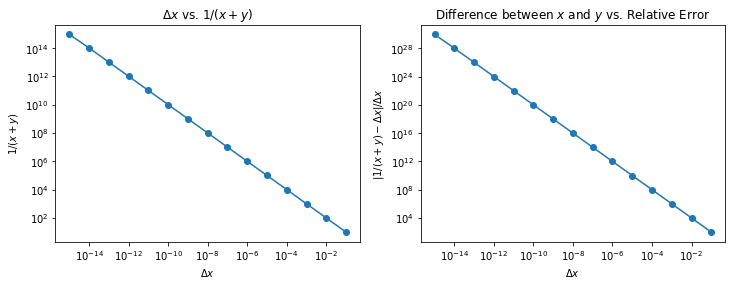

In [36]:
#I have two versions of plot

dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs(1/(x + y) - dx) / (dx)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.loglog(dx, 1/(x + y), 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$1/(x + y)$")
axes.set_title("$\Delta x$ vs. $1/(x+y)$")

axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|1/(x+y) - \Delta x| / \Delta x$")
axes.set_title("Difference between $x$ and $y$ vs. Relative Error")

plt.show()

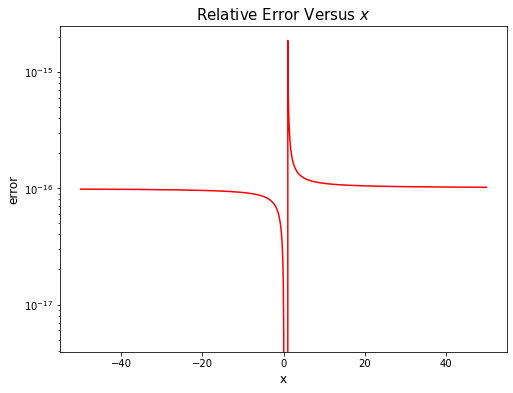

In [46]:
#version 2: fix y, dy, dx

y = -1
dy = 1e-17
dx = 1e-16
x = numpy.linspace(-50,50,1000)
error = (x*dx+y*dy) / (x+y+x*dx+y*dy)

fig = plt.figure(figsize = (8,6))
plt.xlabel("x",fontsize = 12)
plt.ylabel("error", fontsize = 12)
plt.title("Relative Error Versus $x$", fontsize =15)
plt.plot(x,error,"r")
plt.yscale("log")
plt.show()